In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 50)


* try optimizing using the new function
* add insulin dose as predictor variable
* create a new cohort with the slopes in between the prior glucose and try it
* use SMOTE for generating more training data




In [3]:
name = '1stday-pred'

base_dir =  './'

full_df = pd.read_csv('GCP_output.csv')
full_df['Y'] = (full_df['labresult'] < 72).astype(int)

In [4]:
full_df = full_df.drop(['labresult'], axis = 1)
full_df

,Unnamed: 0,admissionWeight,admissionheight,age,gender,Caucasian,African American,Hispanic,Asian,BMI,apachescore,gcs_avg,diabetes,diabetes_t2,diabetes_t1,DKA_binary,hypo_obs,glu_min,glu_last,ALT (SGPT),AST (SGOT),BUN,Hct,Hgb,PT,PTT,RDW,WBC x 1000,albumin,bicarbonate,chloride,creatinine,glucose,lactate,pH,platelets x 1000,potassium,sodium,total bilirubin,heartrate,spo2,nibp_systolic,nibp_diastolic,nibp_mean,temperature,insulin_binary,Y
0,0,73.9,180.3,68,1.0,1.0,0.0,0.0,0.0,22.732803,70.0,15.000000,1.0,0,0,0.0,0.0,109.0,109.0,20.0,24.0,31.0,27.4,8.90,17.39987,24.000000,16.00,14.10,2.300000,16.0,107.0,2.280,165.0,1.3,7.4000,233.0,3.70,135.0,0.4,82.0,98.0,107.0,57.0,76.5,38.15,0,0
1,3,92.3,180.3,59,1.0,1.0,0.0,0.0,0.0,28.392932,28.0,15.000000,0.0,0,0,0.0,0.0,121.0,121.0,30.0,25.0,8.0,31.0,9.90,17.39987,37.740833,19.10,4.10,2.864102,27.0,111.0,0.650,121.0,1.0,7.4000,84.0,3.85,142.0,1.0,95.0,95.0,114.0,58.0,83.0,36.90,0,0
2,4,100.0,190.5,67,1.0,1.0,0.0,0.0,0.0,27.555611,36.0,14.320755,1.0,0,0,0.0,0.0,125.0,155.0,30.0,25.0,13.0,44.2,15.60,11.70000,29.000000,13.70,10.90,2.864102,27.0,101.0,0.710,156.0,1.0,7.4000,159.0,3.80,137.0,1.0,97.0,94.0,122.0,70.0,89.0,36.70,0,0
3,6,156.6,165.1,59,0.0,1.0,0.0,0.0,0.0,57.451002,55.0,13.499132,1.0,0,0,0.0,0.0,129.0,195.0,30.0,25.0,14.5,35.5,11.30,17.39987,37.740833,14.50,7.60,2.864102,31.5,97.5,0.815,196.0,1.0,7.4200,286.5,4.60,135.5,1.0,85.5,98.0,141.0,72.0,99.0,36.45,0,0
4,14,113.9,172.7,81,1.0,1.0,0.0,0.0,0.0,38.189067,45.0,15.000000,0.0,0,0,0.0,0.0,120.0,120.0,30.0,25.0,26.0,25.7,8.00,17.39987,37.740833,15.40,6.90,2.864102,33.0,105.0,1.110,120.0,1.0,7.4000,288.0,4.90,139.0,1.0,102.0,97.0,114.0,64.5,84.0,36.75,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72048,128174,55.4,165.1,50,0.0,0.0,1.0,0.0,0.0,20.324301,52.0,13.499132,0.0,0,0,0.0,0.0,121.0,129.0,9.0,20.0,7.5,26.0,8.25,10.40000,21.000000,17.85,8.20,2.800000,20.0,116.5,0.795,144.0,1.0,7.3245,193.0,4.85,141.5,0.2,67.5,100.0,110.0,58.0,79.0,37.20,0,0
72049,128175,58.4,121.9,79,0.0,0.0,1.0,0.0,0.0,39.301166,21.0,9.000000,1.0,0,0,0.0,0.0,73.0,75.0,36.0,31.0,51.0,22.0,6.90,11.50000,26.000000,19.10,8.40,3.000000,29.0,100.0,5.740,77.0,1.0,7.2800,186.0,5.00,136.0,0.4,70.0,100.0,166.0,72.0,104.0,36.90,0,0
72050,128176,78.4,162.6,79,0.0,1.0,0.0,0.0,0.0,29.653433,54.0,14.900000,0.0,0,0,0.0,0.0,139.0,139.0,12.0,18.0,32.0,39.0,13.50,12.60000,59.000000,13.90,9.95,3.500000,27.0,101.0,1.070,139.0,1.0,7.4000,130.0,3.60,140.0,0.7,92.0,95.0,138.0,79.0,103.5,36.80,0,0
72051,128177,102.0,177.8,73,1.0,0.0,1.0,0.0,0.0,32.265371,158.0,10.193548,1.0,0,0,0.0,1.0,55.0,108.0,272.0,264.0,30.5,31.5,10.75,11.35000,22.500000,14.15,23.70,3.300000,20.5,102.5,2.515,187.0,9.8,7.2275,218.5,3.70,141.0,0.5,71.0,99.0,135.5,71.5,96.5,33.00,0,1


In [5]:
full_df.isna().mean().round(4) * 100

Unnamed: 0          0.0
admissionWeight     0.0
admissionheight     0.0
age                 0.0
gender              0.0
Caucasian           0.0
African American    0.0
Hispanic            0.0
Asian               0.0
BMI                 0.0
apachescore         0.0
gcs_avg             0.0
diabetes            0.0
diabetes_t2         0.0
diabetes_t1         0.0
DKA_binary          0.0
hypo_obs            0.0
glu_min             0.0
glu_last            0.0
ALT (SGPT)          0.0
AST (SGOT)          0.0
BUN                 0.0
Hct                 0.0
Hgb                 0.0
PT                  0.0
PTT                 0.0
RDW                 0.0
WBC x 1000          0.0
albumin             0.0
bicarbonate         0.0
chloride            0.0
creatinine          0.0
glucose             0.0
lactate             0.0
pH                  0.0
platelets x 1000    0.0
potassium           0.0
sodium              0.0
total bilirubin     0.0
heartrate           0.0
spo2                0.0
nibp_systolic   

In [6]:
full_df.columns

Index(['Unnamed: 0', 'admissionWeight', 'admissionheight', 'age', 'gender',
       'Caucasian', 'African American', 'Hispanic', 'Asian', 'BMI',
       'apachescore', 'gcs_avg', 'diabetes', 'diabetes_t2', 'diabetes_t1',
       'DKA_binary', 'hypo_obs', 'glu_min', 'glu_last', 'ALT (SGPT)',
       'AST (SGOT)', 'BUN', 'Hct', 'Hgb', 'PT', 'PTT', 'RDW', 'WBC x 1000',
       'albumin', 'bicarbonate', 'chloride', 'creatinine', 'glucose',
       'lactate', 'pH', 'platelets x 1000', 'potassium', 'sodium',
       'total bilirubin', 'heartrate', 'spo2', 'nibp_systolic',
       'nibp_diastolic', 'nibp_mean', 'temperature', 'insulin_binary', 'Y'],
      dtype='object')

In [7]:
model_df = full_df.dropna()

In [8]:
model_df

,Unnamed: 0,admissionWeight,admissionheight,age,gender,Caucasian,African American,Hispanic,Asian,BMI,apachescore,gcs_avg,diabetes,diabetes_t2,diabetes_t1,DKA_binary,hypo_obs,glu_min,glu_last,ALT (SGPT),AST (SGOT),BUN,Hct,Hgb,PT,PTT,RDW,WBC x 1000,albumin,bicarbonate,chloride,creatinine,glucose,lactate,pH,platelets x 1000,potassium,sodium,total bilirubin,heartrate,spo2,nibp_systolic,nibp_diastolic,nibp_mean,temperature,insulin_binary,Y
0,0,73.9,180.3,68,1.0,1.0,0.0,0.0,0.0,22.732803,70.0,15.000000,1.0,0,0,0.0,0.0,109.0,109.0,20.0,24.0,31.0,27.4,8.90,17.39987,24.000000,16.00,14.10,2.300000,16.0,107.0,2.280,165.0,1.3,7.4000,233.0,3.70,135.0,0.4,82.0,98.0,107.0,57.0,76.5,38.15,0,0
1,3,92.3,180.3,59,1.0,1.0,0.0,0.0,0.0,28.392932,28.0,15.000000,0.0,0,0,0.0,0.0,121.0,121.0,30.0,25.0,8.0,31.0,9.90,17.39987,37.740833,19.10,4.10,2.864102,27.0,111.0,0.650,121.0,1.0,7.4000,84.0,3.85,142.0,1.0,95.0,95.0,114.0,58.0,83.0,36.90,0,0
2,4,100.0,190.5,67,1.0,1.0,0.0,0.0,0.0,27.555611,36.0,14.320755,1.0,0,0,0.0,0.0,125.0,155.0,30.0,25.0,13.0,44.2,15.60,11.70000,29.000000,13.70,10.90,2.864102,27.0,101.0,0.710,156.0,1.0,7.4000,159.0,3.80,137.0,1.0,97.0,94.0,122.0,70.0,89.0,36.70,0,0
3,6,156.6,165.1,59,0.0,1.0,0.0,0.0,0.0,57.451002,55.0,13.499132,1.0,0,0,0.0,0.0,129.0,195.0,30.0,25.0,14.5,35.5,11.30,17.39987,37.740833,14.50,7.60,2.864102,31.5,97.5,0.815,196.0,1.0,7.4200,286.5,4.60,135.5,1.0,85.5,98.0,141.0,72.0,99.0,36.45,0,0
4,14,113.9,172.7,81,1.0,1.0,0.0,0.0,0.0,38.189067,45.0,15.000000,0.0,0,0,0.0,0.0,120.0,120.0,30.0,25.0,26.0,25.7,8.00,17.39987,37.740833,15.40,6.90,2.864102,33.0,105.0,1.110,120.0,1.0,7.4000,288.0,4.90,139.0,1.0,102.0,97.0,114.0,64.5,84.0,36.75,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72048,128174,55.4,165.1,50,0.0,0.0,1.0,0.0,0.0,20.324301,52.0,13.499132,0.0,0,0,0.0,0.0,121.0,129.0,9.0,20.0,7.5,26.0,8.25,10.40000,21.000000,17.85,8.20,2.800000,20.0,116.5,0.795,144.0,1.0,7.3245,193.0,4.85,141.5,0.2,67.5,100.0,110.0,58.0,79.0,37.20,0,0
72049,128175,58.4,121.9,79,0.0,0.0,1.0,0.0,0.0,39.301166,21.0,9.000000,1.0,0,0,0.0,0.0,73.0,75.0,36.0,31.0,51.0,22.0,6.90,11.50000,26.000000,19.10,8.40,3.000000,29.0,100.0,5.740,77.0,1.0,7.2800,186.0,5.00,136.0,0.4,70.0,100.0,166.0,72.0,104.0,36.90,0,0
72050,128176,78.4,162.6,79,0.0,1.0,0.0,0.0,0.0,29.653433,54.0,14.900000,0.0,0,0,0.0,0.0,139.0,139.0,12.0,18.0,32.0,39.0,13.50,12.60000,59.000000,13.90,9.95,3.500000,27.0,101.0,1.070,139.0,1.0,7.4000,130.0,3.60,140.0,0.7,92.0,95.0,138.0,79.0,103.5,36.80,0,0
72051,128177,102.0,177.8,73,1.0,0.0,1.0,0.0,0.0,32.265371,158.0,10.193548,1.0,0,0,0.0,1.0,55.0,108.0,272.0,264.0,30.5,31.5,10.75,11.35000,22.500000,14.15,23.70,3.300000,20.5,102.5,2.515,187.0,9.8,7.2275,218.5,3.70,141.0,0.5,71.0,99.0,135.5,71.5,96.5,33.00,0,1


In [9]:
model_df.groupby("Y").mean().T

Y,0,1
Unnamed: 0,66329.001434,67992.657893
admissionWeight,85.835857,81.125203
admissionheight,169.593967,168.041202
age,64.131261,63.492012
gender,0.550140,0.500455
Caucasian,0.788235,0.721215
African American,0.110852,0.166543
Hispanic,0.029297,0.033275
Asian,0.012456,0.014651
BMI,284.554877,334.152492


In [10]:
sum(model_df["Y"])/len(model_df)

0.16766824420912385

# Creating Train/Test Sets

In [11]:
#Add in stratify to ensure equal label distribution in test/train
train, test, train_labels, test_labels = train_test_split(model_df.drop(['Y'], axis = 1),
                                                          model_df['Y'],
                                                          test_size=0.15,
                                                          random_state=100, stratify = model_df['Y'])



In [12]:
pred_vars = train.columns.to_list()

In [13]:
sum(train_labels)/len(train)

0.16767083027185892

In [14]:
smote = False

if(smote):
  train, train_labels = SMOTE().fit_resample(train, train_labels)

In [15]:
under = False

if(under):

  # Undersampling traning dataframe for majority class
  train_tmp = train.copy()
  train_tmp['Y'] = train_labels

  # Downsample majority class
  df_majority_downsampled = resample(train_tmp[train_tmp['Y'] == 0], 
                                  replace=False,    # sample without replacement
                                  n_samples=len(train_tmp[train_tmp['Y'] == 1]),     # to match minority class
                                  random_state=123) # reproducible results
  
  # Combine minority class with downsampled majority class
  train = pd.concat([df_majority_downsampled, train_tmp[train_tmp['Y'] == 1]])
  
  # Display new class counts
  print(train.Y.value_counts())
  train_labels = train.Y
  train = train.drop(columns=['Y'])

In [16]:
print('Training Dataset Length: ' + str(len(train)))
print('Testing Dataset Length: ' + str(len(test)))

Training Dataset Length: 61245
Testing Dataset Length: 10808


In [17]:
sum(train_labels)/len(train_labels)

0.16767083027185892

# Defining Grid Search

In [18]:
results_list = []

In [19]:
def grid_search_wrapper(clf, param_grid, refit_score='roc_auc'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """

    scorers_list = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall']

    cross_val = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    grid_search = GridSearchCV(clf, param_grid, cv=cross_val, scoring= scorers_list, refit = refit_score, return_train_score=True, n_jobs=-1)

    grid_search.fit(train, train_labels)

    # make the predictions
    y_probs = grid_search.predict_proba(test)[:,1]
    y_pred = grid_search.predict(test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    print('Best Score for {} on Train Set: {}'.format(refit_score, grid_search.best_score_))
    print(grid_search.best_params_)

    results, results_prec, df_delta = performanceTest(test_labels, y_probs)

    results_list.append(df_delta)

    print('\nResults on Test Set Prediction (min delta):')
    for y in results.keys():
      print(str(y) + ': ' + str(np.round(results[y], 4)))

    print('\nResults on Test Set Prediction (max precision):')
    for y in results_prec.keys():
      print(str(y) + ': ' + str(np.round(results_prec[y], 4)))

    # print(roc_auc_score(test_labels, y_pred))
    # print(recall_score(test_labels, y_pred))
    # print(precision_score(test_labels, y_pred))

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(test_labels, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
      

    return grid_search

In [20]:
def performanceTest(realtarget,predictedtarget,verbose=False):
  res = []
  # Create list of threshold to be assessed
  _, _, list_threshold = roc_curve(realtarget, predictedtarget)

  # Calculate performance for each threshold
  for thr in list_threshold:
    p = np.copy(predictedtarget)
  

    # Get AUC
    fpr, tpr, _ = roc_curve(realtarget, p)
    auroc_p = auc(fpr, tpr)

    # Classification
    p[p < thr] = 0; # inferior
    p[p != 0] = 1; # sup or equal

    # Get AUPR
    precision, recall, _ = precision_recall_curve(realtarget, p)
    aupr_p = auc(recall, precision)

    # Confusion matrix
    matrix = confusion_matrix(realtarget, p)

    # Metrics
    acc = accuracy_score(realtarget, p)
    sens = recall_score(realtarget, p) # or recall
    spec = matrix[0,0]/(matrix[0,0]+matrix[0,1]) # TN/TN+FP
    pr = precision_score(realtarget, p)

    df_tmp = pd.DataFrame({'Threshold': [thr], 'Accuracy': [acc],
                           'Precision' : [pr],'Specificity': [spec],
                           'Sensitivity': [sens],'AUC': [auroc_p],
                           'AUPR': [aupr_p], 'Model' : curr_model})
      
    res.append(df_tmp)

  # The next measures are not independent from the threshold.
  res = pd.concat(res, axis=0)
  res.index = pd.RangeIndex(start=0, stop=len(list_threshold), step=1)
  
  thr_delta = res.loc[(res.Sensitivity - res.Specificity).abs().idxmin()]
  if verbose:
    print('\n')
    print(f'Minimizing \u0394(Sen-Spec): AUC={thr_delta.AUC:0.2f}')
    print(f'Minimizing \u0394(Sen-Spec): AUPR={thr_delta.AUPR:0.2f}')
    print(f'Minimizing \u0394(Sen-Spec): Sense={thr_delta.Sensitivity:0.2f}')
    print(f'Minimizing \u0394(Sen-Spec): Spec={thr_delta.Specificity:0.2f}')

  thr_prec = res.loc[res.Precision.idxmax()]
  score_loss = thr_delta.Sensitivity + thr_delta.Specificity

  d_thr_delta =  dict(thr_delta)
  del d_thr_delta['Model']
  d_thr_prec = dict(thr_prec)
  del d_thr_prec['Model']

  
  print(thr_delta)
  return d_thr_delta, d_thr_prec, thr_delta
  #return thr_delta.AUC

# Modeling

Things to try:

* SK Learn Feature Selection
* Ensemble Models
* Adding in Medication
* Each Patient is only considered once, add a feature if they had a hypoglycemic event in previous patient stay
* Minimum glucose during observation window, maybe std?

Best params for roc_auc
{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score for roc_auc on Train Set: 0.7252732875210534
{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


/home/smantena/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold                0.156662
Accuracy                 0.676999
Precision                0.296879
Specificity              0.676968
Sensitivity              0.677152
AUC                      0.734992
AUPR                     0.514079
Model          LogisticRegression
Name: 1661, dtype: object

Results on Test Set Prediction (min delta):
Threshold: 0.1567
Accuracy: 0.677
Precision: 0.2969
Specificity: 0.677
Sensitivity: 0.6772
AUC: 0.735
AUPR: 0.5141

Results on Test Set Prediction (max precision):
Threshold: 0.9429
Accuracy: 0.8324
Precision: 1.0
Specificity: 1.0
Sensitivity: 0.0006
AUC: 0.735
AUPR: 0.5841

Confusion matrix of Random Forest optimized for roc_auc on the test data:
     pred_neg  pred_pos
neg      8838       158
pos      1632       180


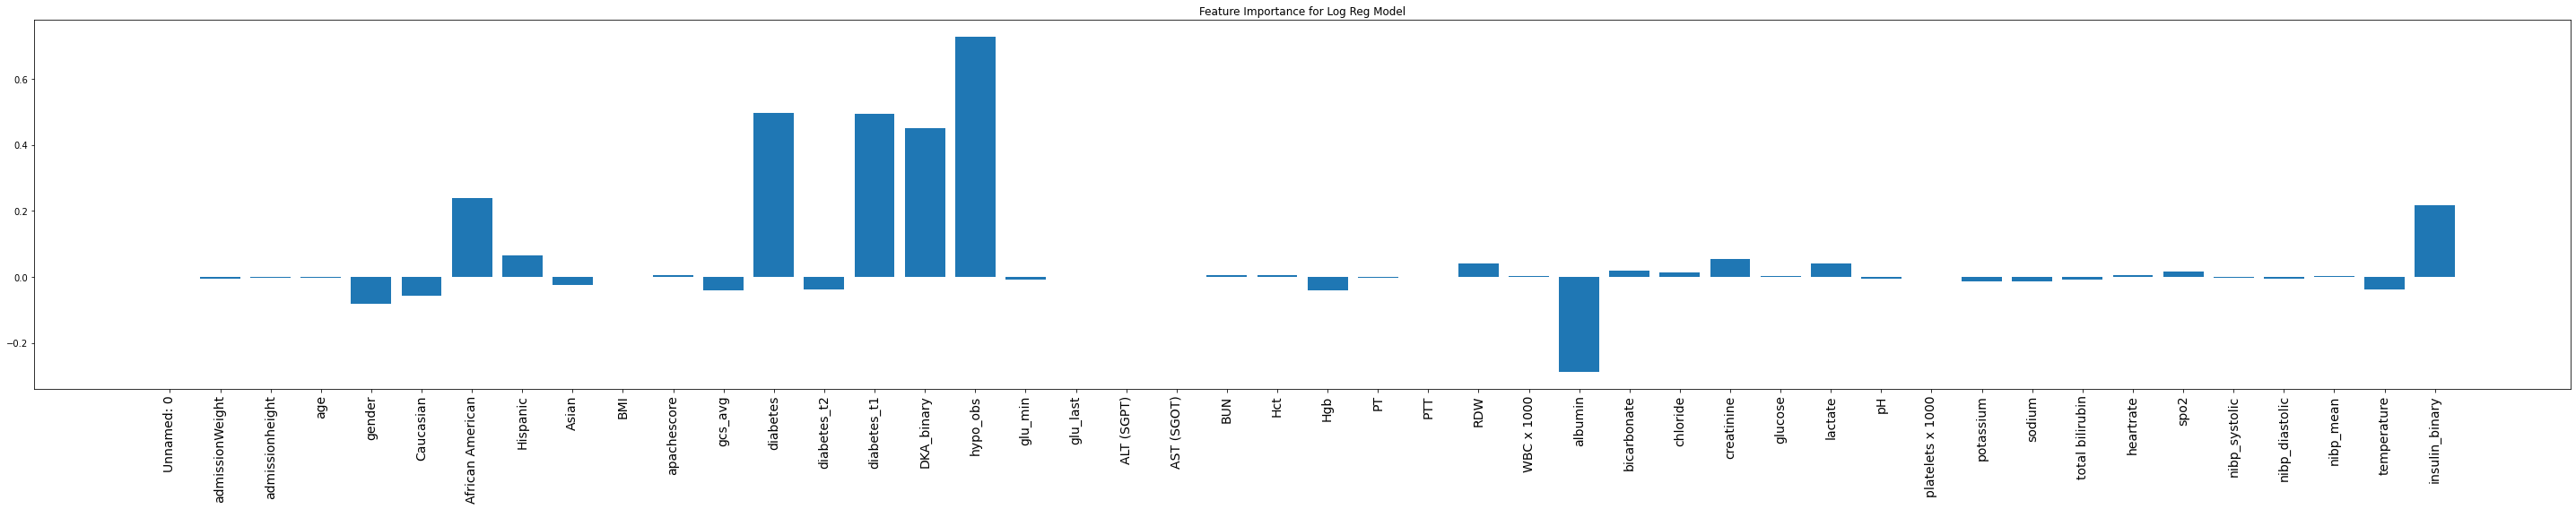

In [21]:
curr_model = 'LogisticRegression'
clf = LogisticRegression(n_jobs=-1)

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l2', 'l1']
}

grid_search = grid_search_wrapper(clf, param_grid)


importance = grid_search.best_estimator_.fit(train, train_labels).coef_[0]

fig, ax = plt.subplots(figsize = (40,8))
plt.bar(np.arange(0, len(importance)), height = importance)
plt.xticks(np.arange(0, len(importance)), labels = pred_vars, fontsize = 14, rotation = 'vertical')
plt.title("Feature Importance for Log Reg Model")

plt.tight_layout()
plt.savefig(base_dir + 'LR feature importance.jpg')
plt.show()


Best params for roc_auc
{'max_depth': 15, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 300}
Best Score for roc_auc on Train Set: 0.7472318657606531
{'max_depth': 15, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 300}


/home/smantena/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold           0.166451
Accuracy            0.676999
Precision           0.296879
Specificity         0.676968
Sensitivity         0.677152
AUC                 0.745456
AUPR                0.514079
Model          Random Forest
Name: 1581, dtype: object

Results on Test Set Prediction (min delta):
Threshold: 0.1665
Accuracy: 0.677
Precision: 0.2969
Specificity: 0.677
Sensitivity: 0.6772
AUC: 0.7455
AUPR: 0.5141

Results on Test Set Prediction (max precision):
Threshold: 0.6664
Accuracy: 0.8324
Precision: 1.0
Specificity: 1.0
Sensitivity: 0.0006
AUC: 0.7455
AUPR: 0.5841

Confusion matrix of Random Forest optimized for roc_auc on the test data:
     pred_neg  pred_pos
neg      8952        44
pos      1704       108


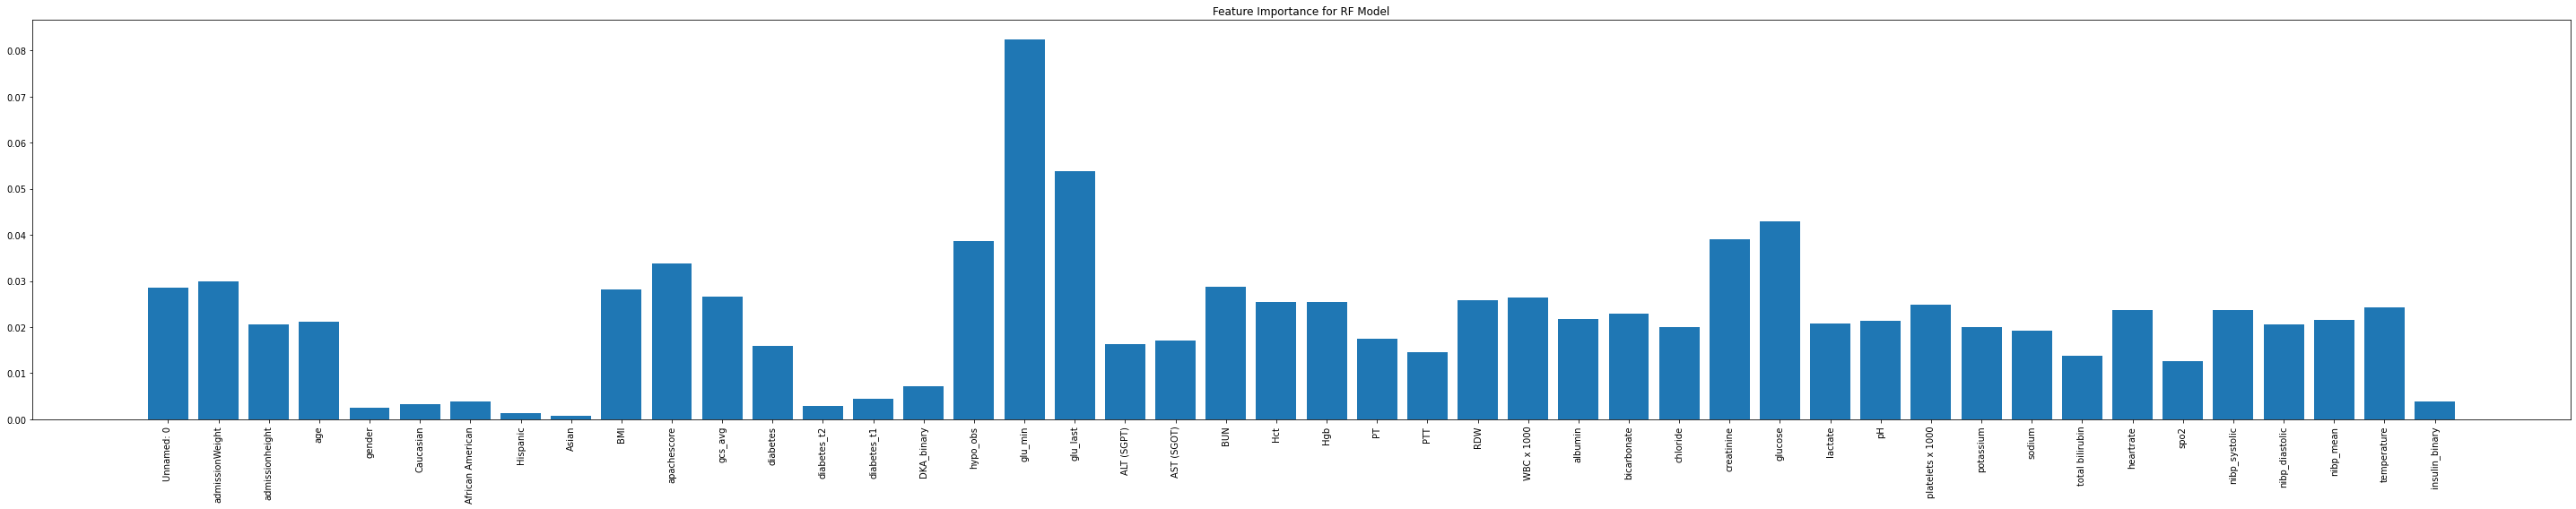

In [22]:
curr_model = 'Random Forest'
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 200, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20, 40]
}

results = grid_search_wrapper(clf, param_grid)

importance = results.best_estimator_.fit(train, train_labels).feature_importances_

fig, ax = plt.subplots(figsize = (40,8))
plt.bar(np.arange(0, len(importance)), height = importance)
plt.xticks(np.arange(0, len(importance)), labels = pred_vars, fontsize = 10, rotation = 'vertical')
plt.title("Feature Importance for RF Model")
plt.tight_layout()
plt.savefig(base_dir + 'RF feature importance.jpg')
plt.show()

In [23]:
curr_model = 'XGBoost'

clf = XGBClassifier(n_jobs=-1)

param_grid = {"max_depth": [6,15],
              "min_child_weight" : [3,6],
              "n_estimators": [200],
              "learning_rate": [0.01,0.1,0.5],
              "colsample_bytree": [0.5,0.7],
              "subsample": [1],
              "max_delta_step": [0.1,3,10],
              "colsample_bylevel": [0.6, 0.7],
              "base_score": [sum(train_labels)/len(train),0.1,0.5],
              }

results = grid_search_wrapper(clf, param_grid)

KeyboardInterrupt: 

In [ ]:
from pandas.plotting import table 
results_df = pd.concat(results_list, axis=1)
finaldf = results_df.T

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, finaldf)  # where df is your data frame
plt.tight_layout()
plt.savefig(base_dir + 'results_cv.pdf')

In [ ]:
finaldf

# Cross Validation Results

In [ ]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
  '''
  Lightweight script to test many models and find winners
  :param X_train: training split
  :param y_train: training target vector
  :param X_test: test split
  :param y_test: test target vector
  :return: DataFrame of predictions
  '''
  dfs = []
  global models
  models = [
 #           ('LinReg', LinearRegression()),
            ('LogReg', LogisticRegression()), 
            ('RF', RandomForestClassifier())
            # ,
            # ('KNN', KNeighborsClassifier()),
            # ('SVM', SVC(probability=True)), 
            # ('GNB', GaussianNB()),
            # ('XGB', XGBClassifier()),
            # ('AdaBoost', AdaBoostClassifier()),
            # ('DecisionTree', DecisionTreeClassifier()),
            # ('Bagging', BaggingClassifier()),
            # ('GradientBoosting', GradientBoostingClassifier())
          ]
    
  results = []
  names = []
  scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
  target_names = ['Control', 'Hypoglycemic']
  probs = {}
  for name, model in models:
          kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=90210)
          cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
          clf = model.fit(X_train, y_train)

          y_pred = clf.predict(X_test)
          y_probs = clf.predict_proba(X_test)[:,1]

          print(name)
          print(classification_report(y_test, y_pred, target_names=target_names))
          print(roc_auc_score(y_test, y_probs))
          results.append(cv_results)
          names.append(name)
          this_df = pd.DataFrame(cv_results)
          this_df['model'] = name
          dfs.append(this_df)
          probs[name] = y_probs
  final = pd.concat(dfs, ignore_index=True)
  

  return final, probs

In [ ]:
final, probs = run_exps(train, train_labels, test, test_labels)

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    df_t = final.loc[final.model == model]
    #bootstrap = df_t.sample(n=30, replace=True)
    #bootstraps.append(bootstrap)
    bootstraps.append(df_t)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

In [ ]:
results_long_nofit

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.title('Comparison of Model by Classification Metric')
plt.savefig(base_dir + 'benchmark_models_performance.png',dpi=300)